In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Building sine wave dataset

x = 0.1*np.arange(0,1000)
data = np.sin(x)

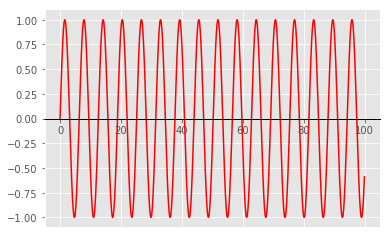

In [3]:
# Ploting Sine wave with generated dataset 

plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [4]:
# Scaling down the raw data with MinMaxScaler()

scaler = MinMaxScaler(feature_range=(0.01, 1))
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [5]:
data_scaled = data_scaled.flatten()

In [6]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]

In [7]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]

In [8]:
# Preparing the training dataset for LSTM input 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 20, 1) Y.Shape: (830,)


In [9]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 20, 1) Y_test.Shape: (150,)


In [10]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 20, 1) x_test.shape: (166, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [11]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((20), batch_input_shape=(None,20,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation='relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

W0724 14:35:44.400551  6164 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 88        
Total params: 1,848
Trainable params: 1,848
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(664,20,1), y_train, epochs=10, validation_data=(x_test.reshape(166,20,1), y_test))

W0724 14:35:47.941532  6164 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 664 samples, validate on 166 samples
Epoch 1/10
664/664 [==============================] - 2s 3ms/sample - loss: 0.4125 - acc: 0.0000e+00 - val_loss: 0.3710 - val_acc: 0.0000e+00
Epoch 2/10
664/664 [==============================] - 0s 598us/sample - loss: 0.2810 - acc: 0.0015 - val_loss: 0.2424 - val_acc: 0.0000e+00
Epoch 3/10
664/664 [==============================] - 0s 604us/sample - loss: 0.2329 - acc: 0.0015 - val_loss: 0.2162 - val_acc: 0.0000e+00
Epoch 4/10
664/664 [==============================] - 0s 702us/sample - loss: 0.1978 - acc: 0.0015 - val_loss: 0.1721 - val_acc: 0.0000e+00
Epoch 5/10
664/664 [==============================] - 0s 609us/sample - loss: 0.1506 - acc: 0.0015 - val_loss: 0.1286 - val_acc: 0.0000e+00
Epoch 6/10
664/664 [==============================] - 0s 605us/sample - loss: 0.0654 - acc: 0.0015 - val_loss: 0.0366 - val_acc: 0.0000e+00
Epoch 7/10
664/664 [==============================] - 0s 601us/sample - loss: 0.0310 - acc: 0.0015 - val_loss: 0

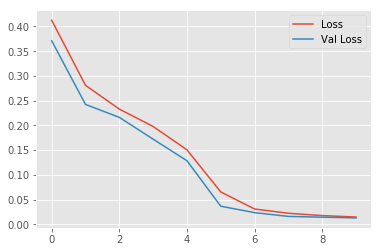

In [14]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = 6,4

In [15]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(166,20,1))

In [16]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([-0.66263354, -0.5964308 , -0.5226196 , -0.44108644, -0.3519334 ,
       -0.2555764 , -0.15282951, -0.04495786,  0.06632026,  0.17889403,
        0.29038575,  0.3983293 ,  0.5003715 ,  0.594464  ,  0.67900765,
        0.7529407 ,  0.815744  ,  0.86738837,  0.90823   ,  0.93888205,
        0.9600801 ,  0.9725647 ,  0.97698814,  0.97385806,  0.9635064 ,
        0.9460945 ,  0.92162836,  0.8899951 ,  0.8510038 ,  0.80443144,
        0.75007313,  0.68779147,  0.61756855,  0.53955644,  0.4541267 ,
        0.3619088 ,  0.26382202,  0.1610785 ,  0.05516704, -0.05220266,
       -0.15918224, -0.26389256, -0.3645379 , -0.45951113, -0.54747456,
       -0.62740505, -0.69860256, -0.76066893, -0.80484474, -0.8374442 ,
       -0.863072  , -0.8839516 , -0.900613  , -0.91469485, -0.9262716 ,
       -0.93207175, -0.9264187 , -0.90904564, -0.8829633 , -0.8502763 ,
       -0.8109801 , -0.7649754 , -0.71207434, -0.65202475, -0.5845568 ,
       -0.50945055, -0.42662156, -0.33621818, -0.23871796, -0.13

In [17]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([-0.6556464 , -0.57698987, -0.49256825, -0.40322505, -0.30985296,
       -0.21338492, -0.11478481, -0.01503781,  0.08485944,  0.18390881,
        0.28112062,  0.37552357,  0.46617441,  0.55216738,  0.63264329,
        0.70679803,  0.77389068,  0.83325087,  0.88428549,  0.92648463,
        0.95942663,  0.98278237,  0.99631846,  0.99989967,  0.99349022,
        0.97715414,  0.95105465,  0.91545255,  0.87070354,  0.81725475,
        0.75564023,  0.68647559,  0.61045192,  0.52832881,  0.44092682,
        0.34911923,  0.25382336,  0.15599137,  0.05660077, -0.04335537,
       -0.14287832, -0.24097368, -0.3366613 , -0.42898512, -0.51702266,
       -0.59989428, -0.67677196, -0.74688755, -0.80954049, -0.86410477,
       -0.9100352 , -0.94687286, -0.97424968, -0.99189211, -0.99962389,
       -0.99736776, -0.98514626, -0.9630815 , -0.93139395, -0.89040023,
       -0.84050991, -0.7822215 , -0.71611739, -0.64285807, -0.56317553,
       -0.47786592, -0.38778164, -0.29382276, -0.19692811, -0.09

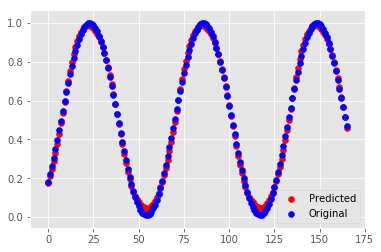

In [18]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

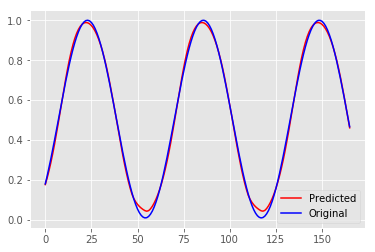

In [19]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [21]:
result_01

array([0.40860096, 0.35735023, 0.30839184, 0.26248014, 0.2202267 ,
       0.18208379, 0.1483457 , 0.11983818, 0.10062651, 0.08599536,
       0.07391038, 0.06452176, 0.05670692, 0.05015817, 0.04483403,
       0.04420274, 0.04876207, 0.05899309, 0.07300597, 0.09028383,
       0.11084447, 0.13475265, 0.1621139 , 0.19305909, 0.22771771,
       0.26618114, 0.30845803, 0.3544251 , 0.40378168, 0.45601413,
       0.51038116, 0.5659283 , 0.6215346 , 0.67598885, 0.7280859 ,
       0.7767262 , 0.82100075, 0.86024934, 0.89408314, 0.9223731 ,
       0.9452082 , 0.9628373 , 0.9756026 , 0.9838761 , 0.98800695,
       0.98828423, 0.98491645, 0.9780247 , 0.96764797, 0.9537574 ,
       0.93627495, 0.9150949 , 0.8901085 , 0.8612278 , 0.82841176,
       0.7916905 , 0.7511915 , 0.7071609 , 0.65998113, 0.6101809 ,
       0.5584319 , 0.5055301 , 0.4523625 , 0.3998588 , 0.34893557,
       0.30044025, 0.25510523, 0.21351568, 0.17609698, 0.14311796,
       0.1159725 , 0.09774405, 0.08383831, 0.0720538 , 0.06311

In [22]:
# look into original Y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([-0.17607562, -0.27346966, -0.36813128, -0.45911465, -0.54551071,
       -0.6264562 , -0.70114234, -0.76882291, -0.82882165, -0.88053907,
       -0.92345845, -0.95715093, -0.98127987, -0.99560419, -0.99998077,
       -0.99436586, -0.97881558, -0.9534853 , -0.91862811, -0.87459229,
       -0.82181784, -0.76083205, -0.69224428, -0.61673983, -0.53507312,
       -0.44806014, -0.35657029, -0.26151771, -0.16385213, -0.06454939,
        0.0353983 ,  0.13499231,  0.23323751,  0.32915229,  0.42177828,
        0.51019001,  0.59350408,  0.67088806,  0.74156875,  0.80483992,
        0.86006941,  0.90670536,  0.94428181,  0.97242331,  0.99084868,
        0.99937382,  0.99791354,  0.98648244,  0.96519474,  0.93426312,
        0.89399666,  0.84479768,  0.78715777,  0.72165283,  0.64893737,
        0.56973795,  0.48484589,  0.39510941,  0.30142514,  0.20472912,
        0.10598751,  0.00618691, -0.0936755 , -0.19260194, -0.28960397,
       -0.38371236, -0.47398683, -0.55952539, -0.63947334, -0.71

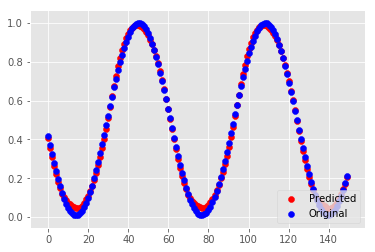

In [23]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

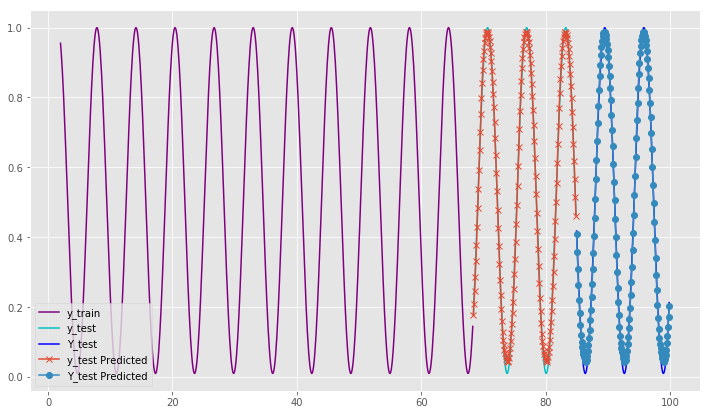

In [25]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test (with scaled values)
# x has 1000 values, which is divided into two ways x[0:850] for (x_train,x_test) and x[850:1000] for X_test
# 20 is the value to look back for LSTM therefore x[20:850] or x[20:-150], 830 total values .... ""
# (80% of 830) 830*0.8 = 664 is x_train .... x[20:850][:664]
# (20% of 830) 830*0.2 = 166 is x_test  .... x[20:850][664:]
# x[850:] 150 values for X_test, these values are un-trained with LSTM model 

x = 0.1*np.arange(0, 1000)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

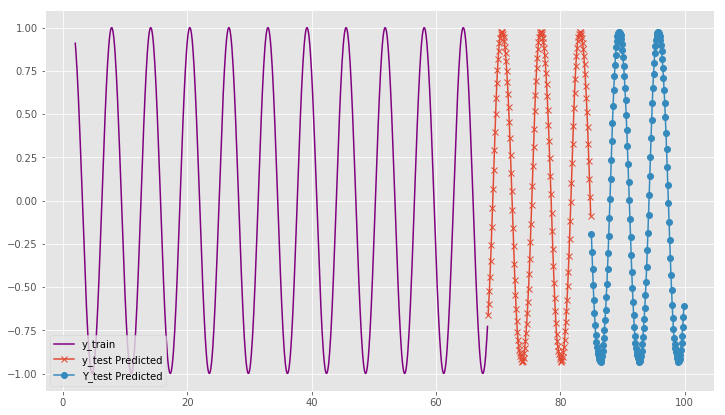

In [26]:
# Plotting y_train, predicted y_test and predicted Y_test (with original values)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(x[20:-150][664:], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(x[850:], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

In [27]:
# z is used to look beyond 1000 data points, it is consist of 1500 data points, means 500 points will be predicted by LSTM model    
z= np.concatenate((x, 0.1*np.arange(1000,1500)), axis=None)

In [28]:
# Look into the future from 1000 to 1500 points

future_predictions = []

# first validation input
last_x = X_test[-1] 

while len(future_predictions) < 500:
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] 
  future_predictions.append(p)  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [29]:
len(future_predictions)

500

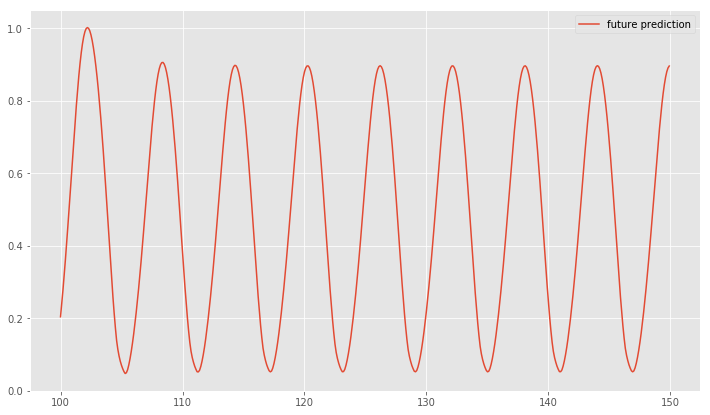

In [30]:
# with scaled values future prediction from 1000 to 1500 points

plt.plot(z[1000:1500],(future_predictions), label='future prediction')
plt.legend()

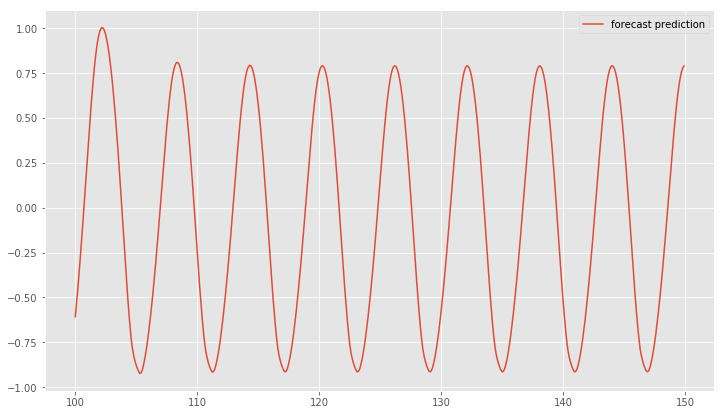

In [32]:
# with original values future prediction from 1000 to 1500 points

plt.plot(z[1000:1500],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='forecast prediction')
plt.legend()

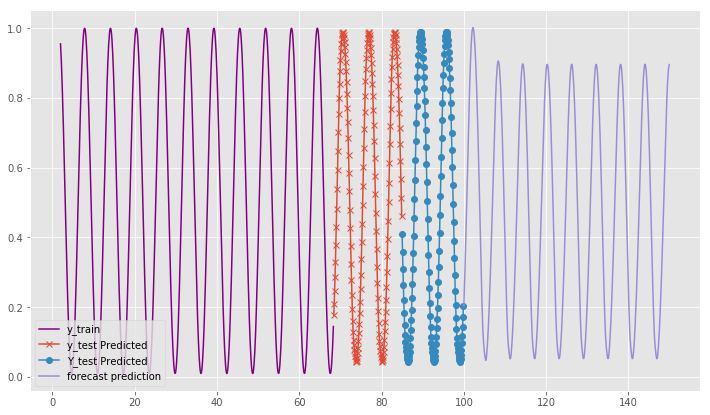

In [33]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with scaled values)

fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], y_train, c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], y_test, 'c-', label='y_test')
# ax1.plot(z[850:1000], Y_test, 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], result, 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], result_01, 'o-', label='Y_test Predicted')

plt.plot(z[1000:1500],future_predictions, label='forecast prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

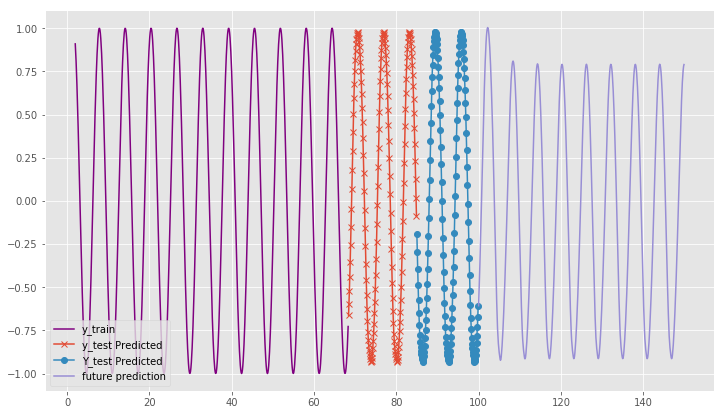

In [34]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with original values)

fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(z[850:1000], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')

plt.plot(z[1000:1500],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='future prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

In [35]:
# Look into the future from 1000 to 2000 points

future_predictions = []

# first validation input
last_x = X_test[-1] 

while len(future_predictions) < 1000:
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] 
  future_predictions.append(p)  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [36]:
len(future_predictions)

1000

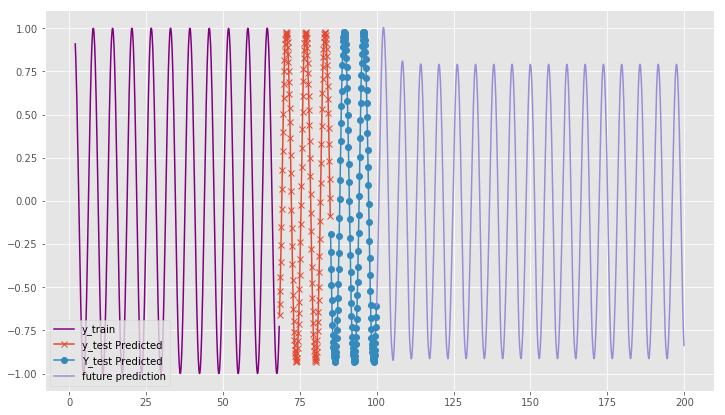

In [37]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with original values)

z= np.concatenate((x, 0.1*np.arange(1000,2000)), axis=None)
fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(z[850:1000], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')

plt.plot(z[1000:2000],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='future prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7